
    
<p style="font-family:Calibri; font-weight:bold; letter-spacing: 2px; font-size:250%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"><b>About the Dataset</b></p>
Phishing emails have become a significant threat to individuals and organizations worldwide. These deceptive emails aim to trick recipients into divulging sensitive information or performing harmful actions. Detecting and preventing phishing emails is crucial to safeguarding personal and financial security. In recent years, machine learning techniques have emerged as a promising approach to combat this growing menace.
The dataset specifies the email text body the type of emails which can be used to detect phishing emails by extensive analytics of the email text and classifying those using machine learning


    
<p style="font-family:Calibri; font-weight:bold; letter-spacing: 2px; font-size:250%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"><b>Exploring the Dataset</b></p>

In this notebook, we will dive into the exciting world of data exploration and analysis. We have a collection of diverse datasets at our disposal, ranging from numerical data to text and images. Through a series of Python code and visualizations, we will uncover valuable insights, patterns, and trends hidden within the data.

The goals of this notebook are as follows:
- Understand the structure and format of the datasets
- Perform data cleaning and preprocessing
- Conduct exploratory data analysis (EDA) to gain initial insights
- Visualize the data using various plots and charts
- Identify correlations and relationships between variables
- Extract meaningful information to inform further analysis or decision-making

Throughout the notebook, we will use popular Python libraries such as Pandas, NumPy, and Matplotlib to manipulate and visualize the data. Additionally, we may leverage specialized libraries depending on the nature of the datasets, such as Seaborn for statistical visualization or NLTK for natural language processing.

So, let's get started on our journey of exploring these fascinating datasets and uncovering the secrets they hold!
    


<div style="display: flex; justify-content: center;">
  <img src="https://media.tenor.com/SRy6HR5ibvsAAAAC/phishing-phisher.gif" alt="Your GIF" width="300" height="200" />
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
!pip install xgboost

from xgboost import XGBClassifier

In [3]:
df= pd.read_csv("Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\r\nHello I am your hot lil horny toy.\r\n ...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
df_safe_email = df[df['Email Type'] == "Safe Email"]
df_phishing_email = df[df['Email Type'] == "Phishing Email"]

In [5]:
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [6]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,Unnamed: 0,Email Text,Email Type
31,31,NaN,Phishing Email
387,387,NaN,Phishing Email
1883,1883,NaN,Phishing Email
2049,2049,NaN,Phishing Email
2451,2451,NaN,Phishing Email
2972,2972,NaN,Phishing Email
3627,3627,NaN,Phishing Email
3806,3806,NaN,Phishing Email
5763,5763,NaN,Phishing Email
6299,6299,NaN,Phishing Email


In [7]:
df_safe_email.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [8]:
df_phishing_email.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [9]:
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [10]:
print(df['Email Text'].iloc[0])

re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones are not compl

In [11]:
df.shape

(18634, 3)

In [12]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


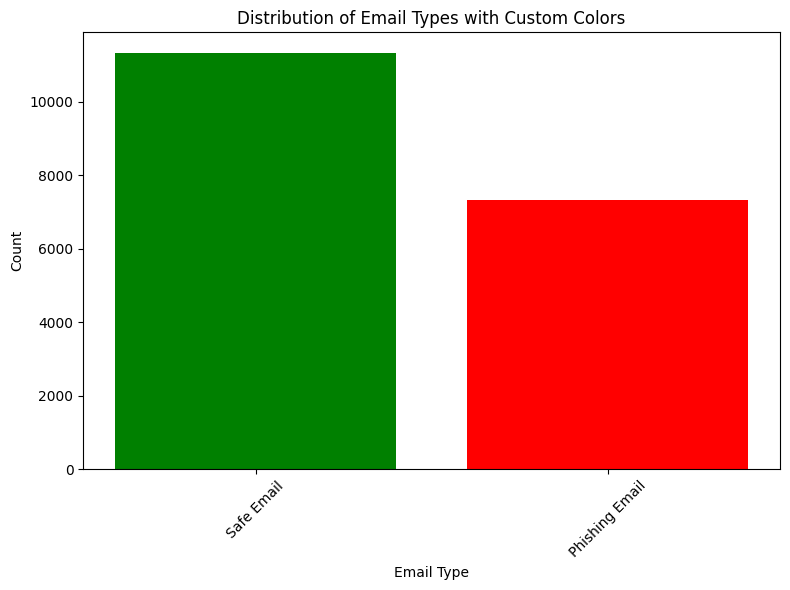

In [13]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

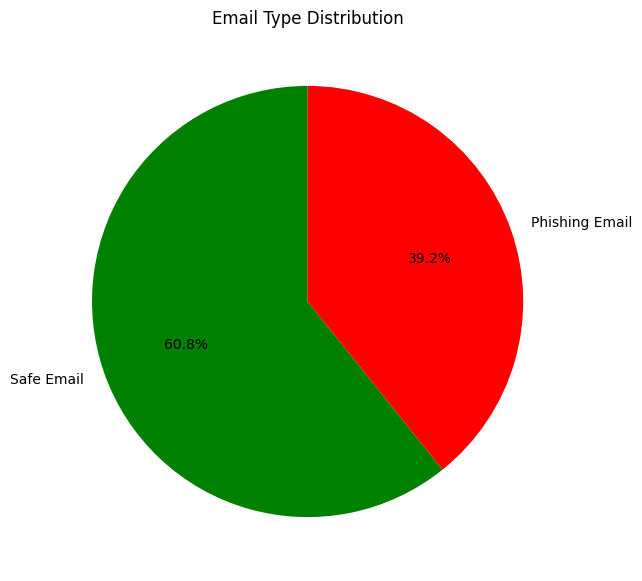

In [14]:
# Plot a pie chart for the distribution of email types
plt.figure(figsize=(7, 7))
plt.pie(email_type_counts, labels=email_type_counts.index, 
        autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Email Type Distribution')
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Undersampling

In [16]:
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [17]:
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [18]:
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,4222,re : i ' ll check my billing ! thanks for the ...,Safe Email
1,599,"URL: http://www.newsisfree.com/click/-4,872399...",Safe Email
2,8779,"On Wed, 2002-07-24 at 18:14, James Rogers wrot...",Safe Email
3,9497,re : inland resources we executed final docume...,Safe Email
4,6057,"re : next step al , i have spoken with mark la...",Safe Email


In [19]:
Data.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [20]:
X = Data["Email Text"].values
y = Data["Email Type"].values
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])

In [22]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [23]:

# Make predictions
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:, 1]  # Probability scores for ROC

# Calculate accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Class labels (you can modify if your classes are named differently)
class_names = ["Safe Email", "Phishing Email"]

Accuracy: 0.93

Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.89      0.97      0.93      2198
    Safe Email       0.97      0.88      0.92      2190

      accuracy                           0.93      4388
     macro avg       0.93      0.93      0.93      4388
  weighted avg       0.93      0.93      0.93      4388



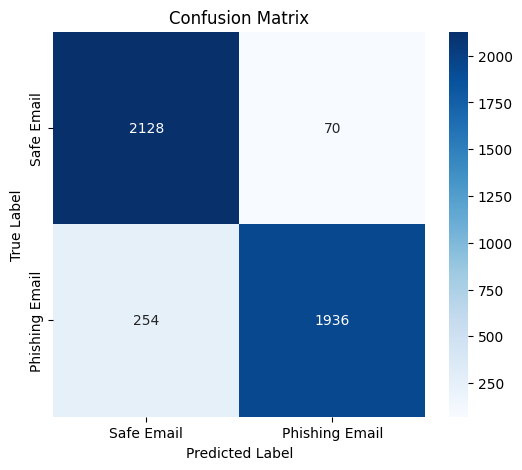

In [24]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


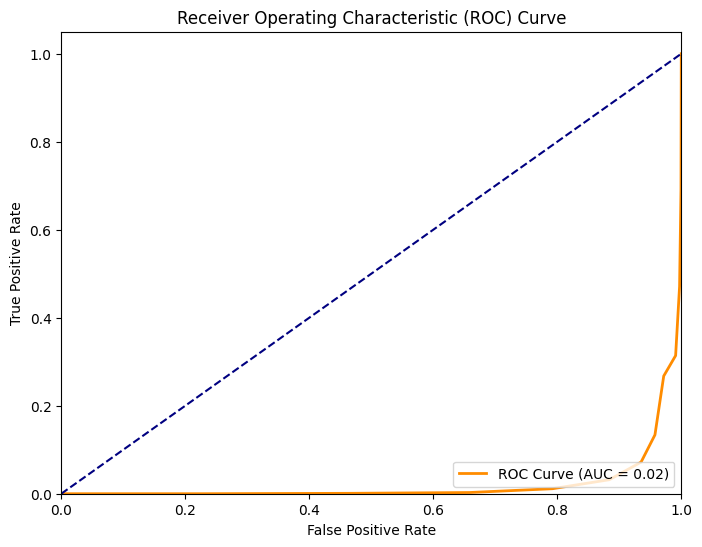

In [25]:

from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, 
    roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Phishing Email')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [26]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.92616226071103

# Cara Penggunaan

In [27]:
new_text = ["Well well weell"]
predictions = classifier.predict(new_text)

In [28]:
predictions

array(['Phishing Email'], dtype=object)

# SVM

In [29]:
from sklearn.svm import SVC

SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])

In [30]:
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

In [31]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
s_ypred = SVM.predict(x_test)
accuracy_score(y_test,s_ypred )

0.4990884229717411

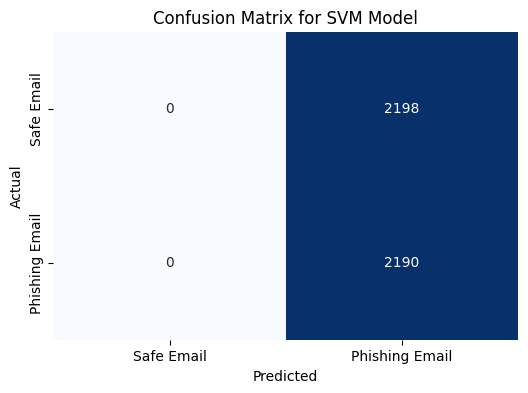

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score



# Confusion matrix
conf_matrix = confusion_matrix(y_test, s_ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=["Safe Email", "Phishing Email"], 
            yticklabels=["Safe Email", "Phishing Email"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()



# Using K-Fold and XGBoost

In [33]:
def read_data(file_path):
    data = pd.read_csv(file_path, encoding='latin-1')
    data.dropna(inplace=True)

    label_encoder = LabelEncoder()
    T_vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), max_features=5000)

    X = data['Email Text'].values
    y = data['Email Type'].values

    for i in range(len(y)):
        if y[i] == 'Phishing Email':
            y[i] = 1
        else:
            y[i] = 0

    y = label_encoder.fit_transform(y)
    return X, y


def print_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val, y_pred)}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

In [34]:
data = pd.read_csv('C:/Users/aafta/OneDrive/Documents/GitHub/cyber_security/Phishing_Email.csv')
print(data.head())
print(data['Email Type'].value_counts())

   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \r\nHello I am your hot lil horny toy.\r\n    ...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  
Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


In [35]:
X, y = read_data('C:/Users/aafta/OneDrive/Documents/GitHub/cyber_security/Phishing_Email.csv')
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

print(X.shape, y.shape)

(18634,) (18634,)


In [36]:
fold = 1

for train_index, val_index in kfold.split(X):

  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 3), max_features=10000)
  vectorizer.fit(X_train)

  X_train = vectorizer.transform(X_train)
  X_val = vectorizer.transform(X_val)
  
  model = XGBClassifier(n_estimators=800, learning_rate=0.1, max_depth=4, colsample_bytree=0.2, n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  print_report(y_val, y_pred, fold)
  fold += 1

Fold: 1
Accuracy Score: 0.9664609605580896
Confusion Matrix: 
 [[2110   99]
 [  26 1492]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2209
           1       0.94      0.98      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.96      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727

Fold: 2
Accuracy Score: 0.9710222699221894
Confusion Matrix: 
 [[2198   81]
 [  27 1421]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2279
           1       0.95      0.98      0.96      1448

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727

Fold: 3
Accuracy Score: 0.9667292728736249
Confusion Matrix: 
 [[2176   84]
 [  40 1427]]
Classification Report: 
  

In [37]:
X_train[1]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52 stored elements and shape (1, 10000)>

# Cara Penggunaan
1 = "Phising Email"

0 = "Safe Email"

In [38]:
new_text = ["Hello this is definetly not a scam"]

# Transform the new text using the same vectorizer
new_text_transformed = vectorizer.transform(new_text)

# Make predictions
predictions = model.predict(new_text_transformed)

print(predictions)

[1]


In [39]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


In [40]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Split the data
X = Data["Email Text"].values
y = Data["Email Type"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
# Define the selected classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [43]:
# Initialize a plot for ROC curves
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [52]:
Data.columns=['word_count','email','type']

In [60]:
data2.to_csv('email_preprocessed.csv',index=False)

In [57]:
data2=Data
data2['type'].replace('Safe Email',0,inplace=True)
data2['type'].replace('Phishing Email',1,inplace=True)

c:\Users\aafta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8555 - loss: 0.3075 - val_accuracy: 0.9610 - val_loss: 0.1334
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9855 - loss: 0.0395 - val_accuracy: 0.9662 - val_loss: 0.1013
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9912 - loss: 0.0228 - val_accuracy: 0.9665 - val_loss: 0.1126
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9900 - loss: 0.0232 - val_accuracy: 0.9662 - val_loss: 0.1194
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9918 - loss: 0.0200 - val_accuracy: 0.9668 - val_loss: 0.1289
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9889 - loss: 0.0218 - val_accuracy: 0.9641 - val_loss: 0.1361
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9912 - loss: 0.0206 - val_accuracy: 0.9651 - val_loss: 0.1398
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9892 - loss: 0.0211 - val_accu

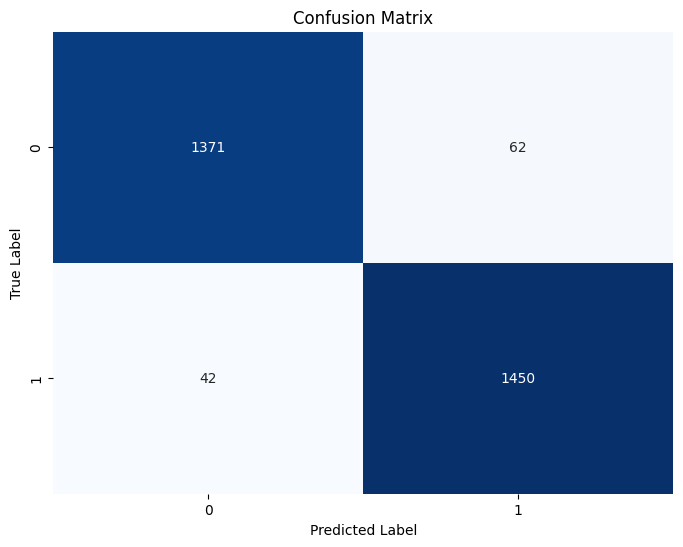

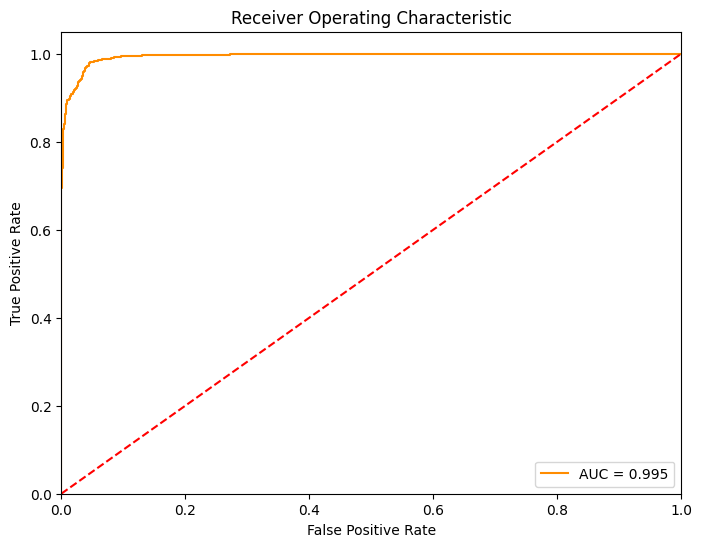

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns



# Extract features and target
X_text = data2['email']  # Text column
word_count = data2['word_count']  # Word count column
y = data2['type']  # Target

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X_text).toarray()

# Combine TF-IDF features with word count
X_combined = np.hstack([X_tfidf, word_count.values.reshape(-1, 1)])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale the combined features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network Model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Handling class imbalance by adjusting class weights
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# class_weights = dict(enumerate(class_weights))
# class_weight=class_weights
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test) )

# Predictions
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(roc_auc), color='darkorange')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


,word_count,email,type
0,4222,re : i ' ll check my billing ! thanks for the ...,0
1,599,"URL: http://www.newsisfree.com/click/-4,872399...",0
2,8779,"On Wed, 2002-07-24 at 18:14, James Rogers wrot...",0
3,9497,re : inland resources we executed final docume...,0
4,6057,"re : next step al , i have spoken with mark la...",0
...,...,...,...
14619,18635,congratulations you have won ! ! ! pls contact...,1
14620,18638,empty,1
14621,18639,strong buy alert : monthly newsletter topstock...,1
14622,18646,date a lonely housewife always wanted to date ...,1
